## Linear Search

In [0]:
#Linear Search
def linear_search(A, t):
  for i, v in enumerate(A):
    if A[i] == t:
      return i
  return -1

## Uninformed Search

In [0]:
import inspect


def get_methods(cls_):
    methods = inspect.getmembers(cls_, inspect.isfunction)
    return dict(methods)

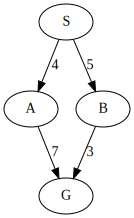

In [478]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = ['S', 'A', 'B', 'G']
for node in nodes:
  dot.node(node)
dot.edge('S', 'A', _attributes={'label': '4'})
dot.edge('S', 'B', _attributes={'label': '5'})
dot.edge('A', 'G', _attributes={'label': '7'})
dot.edge('B', 'G', _attributes={'label': '3'})
dot.render('test-output/ucs', view=True) 

dot

In [479]:
## Graph Search
from collections import defaultdict
al = defaultdict(list)
al['S'] = [('A', 4), ('B', 5)]
al['A'] = [('G', 7)]
al['B'] = [('G', 3)]
al

defaultdict(list,
            {'A': [('G', 7)], 'B': [('G', 3)], 'S': [('A', 4), ('B', 5)]})

### Breath-first Search

In [0]:
def bfs(g, s):
  q = [s]
  while q:
    n = q.pop(0)
    print(n, end = ' ')
    for v, _ in g[n]:
      q.append(v)

In [481]:
bfs(al, 'S')

S A B G G 

### Depth-first Search
The completeness of DFS depends on the search space. If your search space is finite, then Depth-First Search is complete. However, if there are infinitely many alternatives, it might not find a solution. For example, suppose you were coding a path-search problem on city streets, and every time your partial path came to an intersection, you always searched the left-most street first. Then you might just keep going around the same block indefinitely.

Sometimes there are ways to bound the search to get completeness even when the search space is unbounded. For example, for the path-search problem above, if we prune the search whenever a path returns to a previous location on the path, then DFS will always find a solution if one exists.

There are variants of DFS that are complete. One is iterative deepening: you set a maximum search depth for DFS, and only search that far down the search tree. If you don’t find a solution, then you increase the bound and try again. (Note, however, that this method might run forever if there is no solution.)

In [0]:
# Implementation of recursive dfs
def dfs(g, vi):
  print(vi, end=' ')
  for v, _ in g[vi]:   
    dfs(g, v)

In [483]:
dfs(al, 'S')

S A G B G 

In [0]:
# Implementation of iterative dfs
def dfs_iter(g, s):
  stack = [s]
  while stack:
    n = stack.pop()
    print(n, end = ' ')
    for v, _ in g[n]:
      stack.append(v)

In [485]:
dfs_iter(al, 'S')

S B G A G 

### Uniform-Cost Search

```
q = [(0, S)]
Expand S, add A and B
q = [(4, A), (5, B)]
Expand A, add G
q = [(5, B), (11, G)]
Expand B, add G
q = [(8, G), (11, G)]
Expand G, goal found, terminate.
```

In [0]:
import heapq
def ucs(graph, s, t):
  q = [(0, s)] # initial path with cost 0
  while q:
    cost, n = heapq.heappop(q)
    # Need to check when goal is removed from the priority queue
    if n == t:
      return cost
    else:
      for v, c in graph[n]:
        heapq.heappush(q, (c + cost, v))
  return None

In [487]:
ucs(al, s='A', t='G')

7

### Iterative-Deepening Search (IDS)


In [0]:
# Depth limited Search
def dls(graph, cur, t, maxDepth):
  # End Condition
  if maxDepth == 0:
    print('test: ', cur, end = ' ')
    if cur == t:
      return True
  if maxDepth < 0:
    return False

  # Recur for adjacent vertices
  for n, _ in graph[cur]:
    if dls(graph, n, t, maxDepth - 1):
      return True
  return False

In [0]:
# Iterative-deepening search
def ids(graph, s, t, maxDepth):
  for i in range(maxDepth):
    print('depth:', i)
    if dls(graph, s, t, i):
      return True
    print('\n')
  return False
    

In [490]:
# Find 'B'
ids(al, 'S', 'G', 3)

depth: 0
test:  S 

depth: 1
test:  A test:  B 

depth: 2
test:  G 

True

### Bidirectional Search

In [0]:
def bfs_level(graph, q, bStep):
  '''
  q: set for better efficiency in intersection checking
  '''
  if not bStep:
    return q
  nq = set()
  for n in q:
    for v, c in graph[n]:
      nq.add(v)
  return nq

def intersect(qs, qt):
  if qs & qt: # intersection 
    return True
  return False

In [0]:
def bis(graph, s, t):
  # First build a graph with opposite edges 
  bgraph = defaultdict(list)
  for key, value in graph.items():
    for n, c in value:
      bgraph[n].append((key, c))
  print(graph, bgraph)
  # Start bidirectional search
  qs = {s}
  qt = {t}
  step = 0
  while qs and qt:
    print(qs, qt)
    if intersect(qs, qt):
      return True
    qs = bfs_level(graph, qs, step%2 == 0)
    qt = bfs_level(bgraph, qt, step%2 == 1)
    step = 1 - step
  return False


In [493]:
bis(al, 'S', 'A')

defaultdict(<class 'list'>, {'S': [('A', 4), ('B', 5)], 'A': [('G', 7)], 'B': [('G', 3)], 'G': []}) defaultdict(<class 'list'>, {'A': [('S', 4)], 'B': [('S', 5)], 'G': [('A', 7), ('B', 3)]})
{'S'} {'A'}
{'B', 'A'} {'A'}


True

## Graph Search

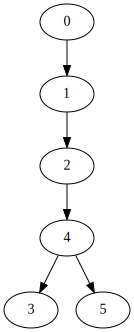

In [494]:
from graphviz import Digraph, Graph
dot = Digraph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [0, 1, 2, 3, 4, 5]
for node in nodes:
  dot.node(str(node))
dot.edges(['01','12', '24', '43', '45'])
dot.render('test-output/free_tree', view=True) 
dot

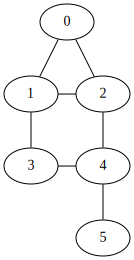

In [495]:
dot = Graph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [0, 1, 2, 3, 4, 5]
# for node in nodes:
#   dot.node(str(node))
dot.edges(['01','02', '12','13', '24','34', '45'])
rank1 = [0]
rank2 = [1, 2]
rank3 = [3, 4]
rank4 = [5]
for rank in [rank1, rank2, rank3, rank4]:
  with dot.subgraph() as s:
    s.attr(rank='same')
    for node in rank:
      s.node(str(node))
dot.render('test-output/undirected_cyclic_graph', view=True) 
dot

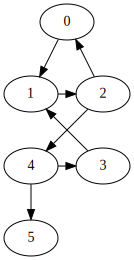

In [496]:
dot = Digraph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [0, 1, 2, 3, 4, 5]
# for node in nodes:
#   dot.node(str(node))
dot.edges(['01', '12','31', '20', '24','43', '45'])
rank1 = [0]
rank2 = [1, 2]
rank3 = [3, 4]
rank4 = [5]
for rank in [rank1, rank2, rank3, rank4]:
  with dot.subgraph() as s:
    s.attr(rank='same')
    for node in rank:
      s.node(str(node))
dot.render('test-output/directed_cyclic_graph', view=True) 
dot

In [0]:
# Prepare Graph Example
# Adjacency List with cycle
ft = [[] for _ in range(6)]
ft[0] = [1]
ft[1] = [2]
ft[2] = [4]
ft[4] = [3, 5]
ft[5] = []

In [0]:
# directed cyclc graph
dcg = [[] for _ in range(6)]
dcg[0] = [1]
dcg[1] = [2]
dcg[2] = [0, 4]
dcg[3] = [1]
dcg[4] = [3, 5]
dcg[5] = []

In [0]:
# Prepare Graph Example
# Adjacency List with cycle
ucg = [[] for _ in range(6)]
ucg[0] = [1, 2]
ucg[1] = [0, 2, 3]
ucg[2] = [0, 1,  4]
ucg[3] = [1, 4]
ucg[4] = [2, 3, 5]
ucg[5] = [4]

In [0]:
#STATE Class
class STATE:
    white = 0
    gray = 1
    black = 2

### Depth-first Search in Graph

#### Track Paths and Avoid Cycle in the tree-based search

In [0]:
#Free Tree Search
def dfs(g, vi):
  print(vi, end=' ')
  for nv in g[vi]:   
    dfs(g, nv)

In [502]:
dfs(ft, 0)

0 1 2 4 3 5 

In [0]:
# Failed with directed cyclic graph
# dfs(dcg, 0)

In [0]:
#Graph Search, track paths and avoids cycle
def dfs(g, vi, path):
  paths.append(path)
  orders.append(vi)
  for nv in g[vi]:  
    if nv not in path: 
      dfs(g, nv, path+[nv])
  return 

In [505]:
# Test free tree
paths, orders = [], []
dfs(ft, 0, [0])
paths, orders

([[0], [0, 1], [0, 1, 2], [0, 1, 2, 4], [0, 1, 2, 4, 3], [0, 1, 2, 4, 5]],
 [0, 1, 2, 4, 3, 5])

In [506]:
# Test dcg
paths, orders = [], []
dfs(dcg, 0, [0])
paths, orders

([[0], [0, 1], [0, 1, 2], [0, 1, 2, 4], [0, 1, 2, 4, 3], [0, 1, 2, 4, 5]],
 [0, 1, 2, 4, 3, 5])

In [507]:
# Test ucg
paths, orders = [], []
dfs(ucg, 0, [0])
paths, orders

([[0],
  [0, 1],
  [0, 1, 2],
  [0, 1, 2, 4],
  [0, 1, 2, 4, 3],
  [0, 1, 2, 4, 5],
  [0, 1, 3],
  [0, 1, 3, 4],
  [0, 1, 3, 4, 2],
  [0, 1, 3, 4, 5],
  [0, 2],
  [0, 2, 1],
  [0, 2, 1, 3],
  [0, 2, 1, 3, 4],
  [0, 2, 1, 3, 4, 5],
  [0, 2, 4],
  [0, 2, 4, 3],
  [0, 2, 4, 3, 1],
  [0, 2, 4, 5]],
 [0, 1, 2, 4, 3, 5, 3, 4, 2, 5, 2, 1, 3, 4, 5, 4, 3, 1, 5])

Draw the search tree

In [0]:
# Only keep the longest path
def dfs_helper(g, vi, path):
  orders.append(vi)
  bpath = True
  for nv in g[vi]:  
    if nv not in path: 
      dfs_helper(g, nv, path+[nv])
      bpath = False
  if bpath:
    paths.append(path)
  return 

In [509]:
paths, orders = [], []
dfs_helper(ucg, 0, [0])
paths, orders

([[0, 1, 2, 4, 3],
  [0, 1, 2, 4, 5],
  [0, 1, 3, 4, 2],
  [0, 1, 3, 4, 5],
  [0, 2, 1, 3, 4, 5],
  [0, 2, 4, 3, 1],
  [0, 2, 4, 5]],
 [0, 1, 2, 4, 3, 5, 3, 4, 2, 5, 2, 1, 3, 4, 5, 4, 3, 1, 5])

In [0]:
# Track edges
def dfs_helper(g, vi, path):
  orders.append(vi)
  node = (vi, 0)
  if vi in tracker:
    node = (vi, tracker[vi] + 1)
    tracker[vi] += 1
  else:
    tracker[vi] = 0
  for nv in g[vi]:  
    if nv not in path: 
      # add an edge
      node1 = (nv, 0)
      if nv in tracker:
        node1 = (nv, tracker[nv]+1)
      edges[node].append(node1)
      dfs_helper(g, nv, path+[nv]) 
  return 

In [511]:
paths, orders = [], []
tracker = defaultdict(int) # node: maximum count
edges = defaultdict(list) # node: node
dfs_helper(ucg, 0, [0])
paths, orders, edges, tracker, len(orders)

([],
 [0, 1, 2, 4, 3, 5, 3, 4, 2, 5, 2, 1, 3, 4, 5, 4, 3, 1, 5],
 defaultdict(list,
             {(0, 0): [(1, 0), (2, 2)],
              (1, 0): [(2, 0), (3, 1)],
              (1, 1): [(3, 2)],
              (2, 0): [(4, 0)],
              (2, 2): [(1, 1), (4, 3)],
              (3, 1): [(4, 1)],
              (3, 2): [(4, 2)],
              (3, 3): [(1, 2)],
              (4, 0): [(3, 0), (5, 0)],
              (4, 1): [(2, 1), (5, 1)],
              (4, 2): [(5, 2)],
              (4, 3): [(3, 3), (5, 3)]}),
 defaultdict(int, {0: 0, 1: 2, 2: 2, 3: 3, 4: 3, 5: 3}),
 19)

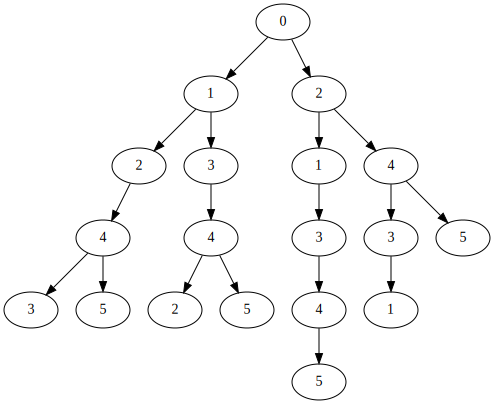

In [512]:
# Plot the search tree
dot = Digraph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [0, 1, 2, 3, 4, 5]
for node, count in tracker.items():
  for i in range(count+1):
    name=str(node)+str(i)
    label=str(node)
    #print(name, label)
    dot.node(name=str(node)+str(i), label=str(node))
for node1, nlist in edges.items():
  for node2 in nlist:
    a = str(node1[0])+str(node1[1])
    b = str(node2[0])+str(node2[1])
    #print(a, b)
    dot.edge(a, b)
#dot.edges(['01', '12','31', '20', '24','43', '45'])
dot.render('test-output/search_tree_dfs', view=True) 
dot

We can see as the edges in the directed graph increase, the search tree explode exponentially with the number of edges. 

In [0]:
#Graph Search, track paths and avoids cycle
def recursive(g, vi, path):
  '''
  g: graph as an adjacency list
  vi: the vertex index
  '''
  #print(vi, end=' ')
  paths, nodes = [[]], []
  for nv in g[vi]:  
    if nv not in path: 
      spaths, snodes = recursive(g, nv, path+[nv])
      paths.extend(spaths)
      nodes.extend(snodes)
  paths = [[vi] + p for p in paths]
  return paths, [vi] + nodes
  

In [514]:
# print path with free tree
recursive(ucg, 0, [0])


([[0],
  [0, 1],
  [0, 1, 2],
  [0, 1, 2, 4],
  [0, 1, 2, 4, 3],
  [0, 1, 2, 4, 5],
  [0, 1, 3],
  [0, 1, 3, 4],
  [0, 1, 3, 4, 2],
  [0, 1, 3, 4, 5],
  [0, 2],
  [0, 2, 1],
  [0, 2, 1, 3],
  [0, 2, 1, 3, 4],
  [0, 2, 1, 3, 4, 5],
  [0, 2, 4],
  [0, 2, 4, 3],
  [0, 2, 4, 3, 1],
  [0, 2, 4, 5]],
 [0, 1, 2, 4, 3, 5, 3, 4, 2, 5, 2, 1, 3, 4, 5, 4, 3, 1, 5])

#### Graph-based Search that avoids repeating vertex

In [0]:
#Avoid Repeating Vertex
def dfgs(g, vi, visited, path):
  visited.add(vi)
  orders.append(vi)
  bEnd = True # node without unvisited adjacent nodes    
  for nv in g[vi]:  
    if nv not in visited: 
      if bEnd:
        bEnd = False
      dfgs(g, nv, visited, path + [nv])
  if bEnd:
    paths.append(path)

In [516]:
paths, orders = [], []
dfgs(ucg, 0, set(), [0])
paths, orders

([[0, 1, 2, 4, 3], [0, 1, 2, 4, 5]], [0, 1, 2, 4, 3, 5])

In [0]:
def backtrace(parent, s, t):
  p = t
  path = []
  while p != s:
    path.append(p)
    p = parent[p]
  path.append(s)
  return path[::-1]

In [0]:
# Backtrace path
# s is used to backtrace the path
def dfgs(g, vi, s, t, visited, parent):  
  visited.add(vi) 
  if vi == t:
    return backtrace(parent, s, t)

  for nv in g[vi]:  
    if nv not in visited: 
      parent[nv] = vi
      fpath = dfgs(g, nv, s, t, visited, parent)
      if fpath:
        return fpath
  
  return None

In [519]:
parent = {}
path = dfgs(ucg, 0, 0, None, set(),  parent)
path, parent

(None, {1: 0, 2: 1, 3: 4, 4: 2, 5: 4})

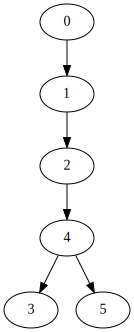

In [520]:
# Visualize the search tree
dot = Digraph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [0, 1, 2, 3, 4, 5]
for node in nodes:
    dot.node(name=str(node))
for s, p in parent.items():
    dot.edge(str(p), str(s))
#dot.edges(['01', '12','31', '20', '24','43', '45'])
dot.render('test-output/depth_first_graph_search_tree', view=True) 
dot

### Breath-first Search in Graph

#### Track pahts and avoid cycle in the tree-based search

In [0]:
# Track paths and avoid cycles
def bfs(g, s):
  q = [[s]]
  paths, orders = [], []
  while q:
    path = q.pop(0)
    n = path[-1]
    orders.append(n)
    bEnd = True
    for v in g[n]:
      if v not in path:
        if bEnd:
          bEnd = False
        q.append(path + [v])
    if bEnd:
      paths.append(path)
  return paths, orders

In [522]:
# Test free tree
bfs(ft, 0)

([[0, 1, 2, 4, 3], [0, 1, 2, 4, 5]], [0, 1, 2, 4, 3, 5])

In [523]:
# Test dcg
bfs(dcg, 0)

([[0, 1, 2, 4, 3], [0, 1, 2, 4, 5]], [0, 1, 2, 4, 3, 5])

In [524]:
# Test ucg
paths, orders = bfs(ucg, 0)
print(paths, orders)
'''
From dfs
[[0, 1, 2, 4, 3],
  [0, 1, 2, 4, 5],
  [0, 1, 3, 4, 2],
  [0, 1, 3, 4, 5],
  [0, 2, 1, 3, 4, 5],
  [0, 2, 4, 3, 1],
  [0, 2, 4, 5]],
'''
print(len(orders))

[[0, 2, 4, 5], [0, 1, 2, 4, 3], [0, 1, 2, 4, 5], [0, 1, 3, 4, 2], [0, 1, 3, 4, 5], [0, 2, 4, 3, 1], [0, 2, 1, 3, 4, 5]] [0, 1, 2, 2, 3, 1, 4, 4, 4, 3, 3, 5, 3, 5, 2, 5, 4, 1, 5]
19


#### Graph-based search that avoids repeating vertex

In [0]:
# Track paths and avoid cycles in a memory efficient way
# Only track shortest paths
def bfgs(g, s, t):
  q = [s]
  bfgs.parent = {}
  visited = {s}
  while q:
    n = q.pop(0)
    if n == t:
      return backtrace(s, t, bfgs.parent)
    for v in g[n]:
      if v not in visited:
        q.append(v)
        visited.add(v)
        bfgs.parent[v] = n
  return None

In [0]:
#Print Shortest Path Iterative
def backtrace(s, t, parent):
  p = t
  path = []
  while p != s:
    path.append(p)
    p = parent[p]
  path.append(s)
  return path[::-1]

In [0]:
#Print Shortest Path Recursive
def get_path(s, t, pl, path):
  if s == t:   
    pass
  elif pl[t] is None:
    print('no path from ', s, ' to ', t)
  else:
    get_path(s, pl[t], pl, path)   
  path.append(t)
  return

In [528]:
# Test ucg
bfgs(ucg, 0, 5)

[0, 2, 4, 5]

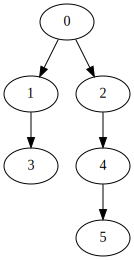

In [529]:
# Visualize the search tree
bfgs(ucg, 0, None)
parent = bfgs.parent
dot = Digraph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [0, 1, 2, 3, 4, 5]
for node in nodes:
    dot.node(name=str(node))
for s, p in parent.items():
    dot.edge(str(p), str(s))
#dot.edges(['01', '12','31', '20', '24','43', '45'])
dot.render('test-output/breath_first_graph_search_tree', view=True) 
dot

#### Multiple Starts

In [0]:
#Multiple Starts
def BFSLevel(starts):
    q = starts # a list of nodes
    #root.visited = 1
    while q:
        new_q = []
        for node in q:
            for neig in node.adjacent:
               if not neig.visited:
                   neig.visited = 1
                   new_q.append(neig)
        q = new_q

####Level by level bfs

In [0]:
def bfs_level(g, s):
  '''level by level bfs'''
  v = len(g)
  state = [False] * v
  
  orders = []
  lst = [s]
  state[s] = True
  d = 0 # track distance
  while lst:
    print('distance ', d, ': ', lst)
    tmp_lst = []
    for u in lst:
      orders.append(u)
      for v in g[u]:
        if not state[v]:
          state[v] = True
          tmp_lst.append(v)    
    lst = tmp_lst
    d += 1
  return orders
          

In [532]:
print(bfs_level(ucg, 0))

distance  0 :  [0]
distance  1 :  [1, 2]
distance  2 :  [3, 4]
distance  3 :  [5]
[0, 1, 2, 3, 4, 5]



## Depth-first Graph Search

### Recursive Implementation

In [0]:
#Recursive implementation with three states
def dfs(g, s, colors, orders, complete_orders):
  colors[s] = STATE.gray
  orders.append(s)
  for v in g[s]:
    if colors[v] == STATE.white:
      dfs(g, v, colors, orders, complete_orders)
  # complete
  colors[s] = STATE.black
  complete_orders.append(s)
  return

In [534]:
# initialization
'''start from 0'''
v = len(ucg)
orders, complete_orders = [], []
colors = [STATE.white] * v
dfs(ucg,0, colors, orders, complete_orders)
print(orders, complete_orders)

[0, 1, 2, 4, 3, 5] [3, 5, 4, 2, 1, 0]


Visualizing the state change of nodes

In [0]:
# directed cyclc graph
dcg = [[] for _ in range(6)]
dcg[0] = [1, 2]
dcg[1] = [2, 4]
dcg[2] = [0, 4]
dcg[3] = [1]
dcg[4] = [3, 5]
dcg[5] = [3] # cross edge

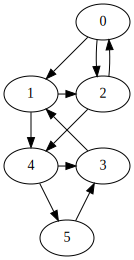

In [536]:
dot = Digraph(comment='The Round Table', format='png')
#print(get_methods(Digraph))
#print(Digraph.__dict__)
nodes = [0, 1, 2, 3, 4, 5]
rank1 = [0]
rank2 = [1, 2]
rank3=[3, 4]
rank4 = [5]
ranks=[rank1, rank2, rank3, rank4]
for i, rank in enumerate(ranks):
      with dot.subgraph(name=name+str(i)) as s:
        s.attr(rank='same')
        for node in rank:
          s.node(str(node))
dot.edges(['01', '02', '12', '14', '31', '20', '24','43', '45', '53'])
dot.render('test-output/directed_cyclic_graph_2', view=True) 
dot

In [0]:
def set_node_style(dot, color, node, name):
  dot.attr('node', style='filled', fillcolor=color, fontcolor='red')#color=color)
  dot.node(name=name, label=str(node))


def plot(g, colors,  dot, edges, nodes):
  #dot = Digraph(comment='The Round Table', format='png')
  name = str(next(counter))
  
  with dot.subgraph(name=name) as s:
    for node in nodes:
      if colors[node] == STATE.gray:
        set_node_style(dot, 'gray', node, name=str(node)+name)
      elif colors[node] == STATE.black:
        set_node_style(dot, 'black', node, name=str(node)+name)
      else:
        set_node_style(dot, 'white', node, name=str(node)+name)
    for s, e in edges:
      dot.edge(str(s)+name, str(e)+name)

  
    #s.edges(['01', '12','31', '20', '24','43', '45'])
    #dot.render('test-output/depth_first_graph_search'+str(next(counter)), view=True) 
    #s.view()

In [0]:
def plot_state(g, colors,  dot, edges_list):
  #dot = Digraph(comment='The Round Table', format='png')
  name = str(next(counter))
  with dot.subgraph(name=name) as init:
    nodes = len(g)
    rank1 = [0]
    rank2 = [2, 1]
    rank3 = [4, 3]
    rank4 = [5]
    ranks = [rank1, rank2, rank3, rank4]
   
    for i, rank in enumerate(ranks):
      with init.subgraph(name=name+str(i)) as s:
        s.attr(rank='same')
        for node in rank:
          
          if colors[node] == STATE.gray:
            set_node_style(s, 'gray', node, name=str(node)+name)
          elif colors[node] == STATE.black:
            set_node_style(s, 'black', node, name=str(node)+name)
          else:
            set_node_style(s, 'white', node, name=str(node)+name)
      # 
    for s in range(nodes):
      for e in g[s]:
        init.edge(str(s)+name, str(e)+name)
    # tracker = defaultdict(set) # edges
    # for s in range(nodes):
    #   for e in g[s]:
    #     ##print(s, e, tracker)
    #     if e in tracker and s in tracker[e]:
    #       continue
    #     else:
    #       tracker[s].add(e)
    #     init.edge(str(s)+name, str(e)+name)
        init.render('test-output/depth_first_graph_search_process'+name, view=True, format='png') 

In [0]:
def plot_all(g, colors,  dot, edges_list):
  #dot = Digraph(comment='The Round Table', format='png')
  name = str(next(counter))
  with dot.subgraph(name=name) as init:
    nodes = set()
    rank1 = [0]
    rank2 = [1]
    rank2_1=[2]
    rank3 = [4]
    rank4 = [3, 5]
    ranks = [rank1, rank2, rank2_1, rank3, rank4]
    for edges in edges_list:
      for s, e in edges:
        nodes.add(s)
        nodes.add(e)
   
    for i, rank in enumerate(ranks):
      with init.subgraph(name=name+str(i)) as s:
        s.attr(rank='same')
        for node in rank:
          if node not in nodes:
            continue
          
          if colors[node] == STATE.gray:
            set_node_style(s, 'gray', node, name=str(node)+name)
          elif colors[node] == STATE.black:
            set_node_style(s, 'black', node, name=str(node)+name)
          else:
            set_node_style(s, 'white', node, name=str(node)+name)
      # 
    # tracker = defaultdict(set) # edges
    # for s in range(nodes):
    #   for e in g[s]:
    #     ##print(s, e, tracker)
    #     if e in tracker and s in tracker[e]:
    #       continue
    #     else:
    #       tracker[s].add(e)
    #     init.edge(str(s)+name, str(e)+name)
      
    
    colors = ['black', 'red']
    for i, edges in enumerate(edges_list):
      if not edges:
        continue
      for start, end in edges:
        if start is not None:
          init.edge(str(start)+name, str(end)+name,_attributes={'dir':'forward', 'color': colors[i]})
    init.render('test-output/depth_first_graph_search_process'+name, view=True, format='png') 



In [0]:
!rm test-output/depth_first_graph_search*

In [541]:
!rm *.gv*

rm: cannot remove '*.gv*': No such file or directory


In [0]:
# Visualizing
edges = []
back_edges = []
def dfs(g, s, colors, dot, nodes, pre_node):
  nodes.add(s)
  colors[s] = STATE.gray
  #plot(g, colors,  dot, edges, nodes)
  global edges
  global back_edges
  plot_fun(g, colors,  dot, [edges, back_edges])
  for v in g[s]:
    if colors[v] == STATE.white:
      edges += [(s, v)]
      dfs(g, v, colors, dot, nodes, s)
      back_edges += [(v, s)]
      #plot_fun(g, colors,  dot, [edges, back_edges])
  # complete
  
  colors[s] = STATE.black
  #plot(g, colors, dot, edges, nodes)
  plot_fun(g, colors,  dot, [edges, back_edges])
  return

[[1, 2], [2, 4], [0, 4], [1], [3, 5], [3]]


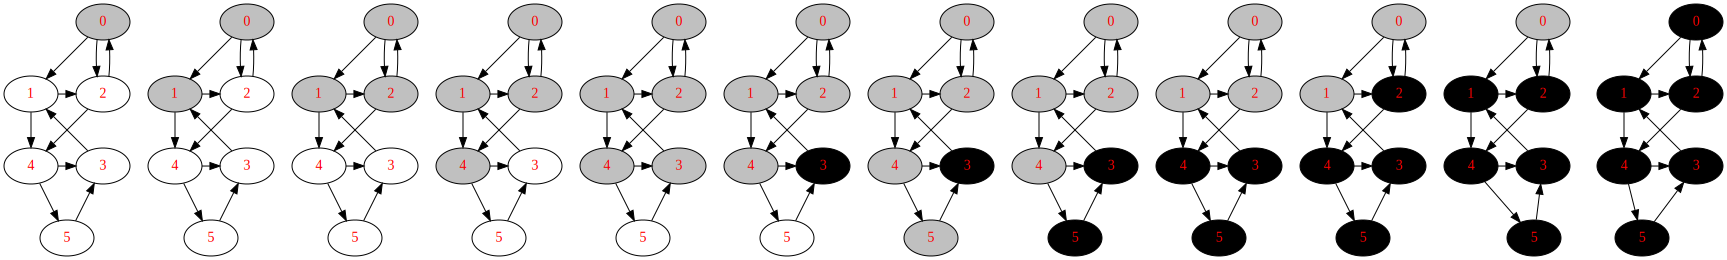

In [543]:
# Plot_state
import itertools
counter = itertools.count()
print(dcg)
v = len(dcg)
colors = [STATE.white] * v
dot = Digraph(comment='The Round Table', format='png')
plot_fun = plot_state
dfs(dcg,0, colors, dot, set(), None)
dot.render('test-output/depth_first_graph_search_process', view=True) 
dot

[(0, 1), (1, 2), (2, 4), (4, 3), (4, 5)] [(3, 4), (5, 4), (4, 2), (2, 1), (1, 0)]
0 1 [[1], [2], [4], [], [3, 5], []]
0 2 [[1], [2], [4], [], [3, 5], []]
1 2 [[1], [2], [4], [], [3, 5], []]
1 4 [[1], [2], [4], [], [3, 5], []]
2 0 [[1], [2], [4], [], [3, 5], []]
2 4 [[1], [2], [4], [], [3, 5], []]
3 1 [[1], [2], [4], [], [3, 5], []]
4 3 [[1], [2], [4], [], [3, 5], []]
4 5 [[1], [2], [4], [], [3, 5], []]
5 3 [[1], [2], [4], [], [3, 5], []]
[[(0, 1), (1, 2), (2, 4), (4, 3), (4, 5)], [(2, 0), (3, 1)], [(0, 2), (1, 4)], [(5, 3)]]


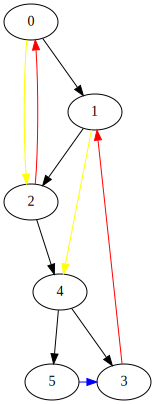

In [544]:
# Classify edges
# edges is tree edge
# need to formulate better
'''
dcg[0] = [1, 2]
dcg[1] = [2, 4]
dcg[2] = [0, 4]
dcg[3] = [1]
dcg[4] = [3, 5]
dcg[5] = [3] # cross edge
'''
print(edges, back_edges)
tree = ft
tree_edges = edges
nodes = len(dcg)
new_edges, n_back_edges, forward_edges, cross_edges = [], [], [], []
# reversed tree:
reverse_tree = [[] for _ in range(nodes)]
for s in range(nodes):
  for e in tree[s]: 
    reverse_tree[e].append(s)
for s in range(nodes):
  for e in dcg[s]:
    print(s, e, tree)
    if (s, e) in tree_edges:
      new_edges.append((s, e))
    elif bfgs(tree, e, s ):
      n_back_edges.append((s, e))
    elif bfgs(tree, s, e ):
      forward_edges.append((s ,e))
    else:
      cross_edges.append((s, e))

edges_list = [new_edges, n_back_edges, forward_edges, cross_edges ]
dot = Digraph(comment='The Round Table', format='png')
print(edges_list)
rank1 = [0]
rank2 = [1]
rank2_1=[2]
rank3 = [4]
rank4 = [3, 5]
ranks = [rank1, rank2, rank2_1, rank3, rank4]
dot.attr(ranksep='0.75', rank='same')

  

colors = ['black', 'red', 'yellow', 'blue']
for i, edgesx in enumerate(edges_list):
  if not edgesx:
    continue
  for start, end in edgesx:
    if start is not None:
      dot.edge(str(start), str(end),_attributes={ 'color': colors[i]})
for i, rank in enumerate(ranks):
  with dot.subgraph(name=str(i)) as s:
    s.attr(ranksep='0.75', rank='same')
    for node in rank:
      s.node(name=str(node))
dot.render('test-output/depth_first_graph_search_edges', view=True, format='png') 
#print(dot.source)
dot


More about the application of classificatio of edges. 

Discover and finish time

In [0]:
#Discovering and finishing time
def dfs(g, s, colors):
  dfs.t += 1 # static variable
  colors[s] = STATE.gray
  dfs.discover[s] = dfs.t
  for v in g[s]:
    if colors[v] == STATE.white:
      dfs(g, v, colors)
  # complete
  dfs.t += 1
  dfs.finish[s] = dfs.t
  return

In [546]:
v = len(dcg)
colors = [STATE.white] * v
dfs.t = -1
dfs.discover, dfs.finish = [-1] * v, [-1] * v
dfs(dcg,0, colors)
dfs.discover, dfs.finish

([0, 1, 2, 4, 3, 6], [11, 10, 9, 5, 8, 7])

In [0]:
def parenthesis(dt, ft, n):
  merge_orders = [-1] * 2 * n
  for v, t in enumerate(dt):
    merge_orders[t] = v
  for v, t in enumerate(ft):
    merge_orders[t] = v

  print(merge_orders)
  nodes = set()
  for i in merge_orders:
    if i not in nodes:
      print('(', i, end = ', ')
      nodes.add(i)
    else:
      print(i, '),', end = ' ')

In [548]:
parenthesis(dfs.discover, dfs.finish, v)

[0, 1, 2, 4, 3, 3, 5, 5, 4, 2, 1, 0]
( 0, ( 1, ( 2, ( 4, ( 3, 3 ), ( 5, 5 ), 4 ), 2 ), 1 ), 0 ), 

### Iterative Implementation ***

In [0]:
#Iterative implementation with three states
def dftIter(g, s):
  '''not preserving the same discovery ordering'''
  n = len(g)
  orders = []
  colors = [STATE.white] * n
  stack = [s]

  orders.append(s) # track gray order
  colors[s] = STATE.gray
        
  while stack:
    u = stack.pop()
    
    for v in g[u]:
      if colors[v] == STATE.white:
        colors[v] = STATE.gray
        stack.append(v)
        orders.append(v) # track gray order
    
  return orders

In [550]:
# initialization
'''start from 0'''
print(dftIter(ucg,0))

[0, 1, 2, 4, 3, 5]


In [551]:
print(dftIter(ucg, 1))

[1, 0, 2, 3, 4, 5]


In [0]:
def dftIter(g, s):
  '''preserving only discovery ordering'''
  n = len(g)
  orders = []
  colors = [STATE.white] * n
  stack = [s]

  #orders.append(s) # track gray order
  #colors[s] = STATE.gray
        
  while stack:
    u = stack.pop()
    if colors[u] == STATE.white:
      orders.append(u) # track gray order
    colors[u] = STATE.gray
    for v in g[u][::-1]:
      if colors[v] == STATE.white:
        
        stack.append(v)
        #orders.append(v) # track gray order
    
  return orders

In [553]:
print(dftIter(ucg, 0))

[0, 1, 2, 4, 3, 5]


In [554]:
print(dftIter(ucg, 1))

[1, 0, 2, 4, 3, 5]


In [0]:
def dfsIter(g, s):
  '''iterative dfs'''
  v = len(g)
  orders, complete_orders = [], []
  colors = [STATE.white] * v
  stack = [s]

  orders.append(s) # track gray order
  colors[s] = STATE.gray
        
  while stack:
    u = stack[-1]
    bAdj = False
    for v in g[u]:
      if colors[v] == STATE.white:
        colors[v] = STATE.gray
        stack.append(v)
        orders.append(v) # track gray order
        bAdj = True
        break
     
    if not bAdj: # if no adjacent is found, pop out
      # complete
      colors[u] = STATE.black # this is not necessary in the code, just to help track the state
      complete_orders.append(u)
      stack.pop()
    
  return orders, complete_orders       

In [556]:
print(dfsIter(ucg, 0))

([0, 1, 2, 4, 3, 5], [3, 5, 4, 2, 1, 0])


## Breath-first Graph Search

In [0]:
def bfgs_state(g, s):
  v = len(g)
  colors = [STATE.white] * v
  
  q, orders = [s], [s]
  complete_orders = []
  colors[s] = STATE.gray # make the state of the visiting node
  while q:
    u = q.pop(0)   
    for v in g[u]:
      if colors[v] == STATE.white:
        colors[v] = STATE.gray
        q.append(v)
        orders.append(v)

    # complete 
    colors[u] = STATE.black
    complete_orders.append(u)
  return orders, complete_orders

In [558]:
bfgs_state(dcg, 0)

([0, 1, 2, 4, 3, 5], [0, 1, 2, 4, 3, 5])

In [0]:
# Plot state
def plot_state_bfs(g, colors,  dot, png_name):
  #dot = Digraph(comment='The Round Table', format='png')
  #name = str(next(counter))
  with dot.subgraph(name=png_name) as init:
    nodes = len(g)
    rank1 = [0]
    rank2 = [2, 1]
    rank3 = [4, 3]
    rank4 = [5]
    ranks = [rank1, rank2, rank3, rank4]
   
    for i, rank in enumerate(ranks):
      subgraph_name = png_name + str(i)
      with init.subgraph() as s:
        s.attr(rank='same')
        for node in rank:
          
          if colors[node] == STATE.gray:
            set_node_style(s, 'gray', node, name=str(node)+png_name)
          elif colors[node] == STATE.black:
            set_node_style(s, 'black', node, name=str(node)+png_name)
          else:
            set_node_style(s, 'white', node, name=str(node)+png_name)
      # 
    for s in range(nodes):
      for e in g[s]:
        init.edge(str(s)+png_name, str(e)+png_name)
    init.render('test-output/'+png_name, view=True, format='png') 

In [0]:
def bfgs_state_plot(g, s):
  v = len(g)
  colors = [STATE.white] * v

  dot = Digraph(comment='The Round Table', format='png')

  
  q = [s]
  colors[s] = STATE.gray # make the state of the visiting node
  counter = itertools.count()
  plot_state_bfs(g, colors,  dot, png_name='breath_first_graph_search_process'+str(next(counter)))
  while q:
    u = q.pop(0)   
    for v in g[u]:
      if colors[v] == STATE.white:
        colors[v] = STATE.gray
        q.append(v)
        plot_state_bfs(g, colors,  dot, png_name='breath_first_graph_search_process'+str(next(counter)))

    # complete 
    colors[u] = STATE.black
    plot_state_bfs(g, colors,  dot, png_name='breath_first_graph_search_process'+str(next(counter)))
  #dot.render('test-output/breath_first_graph_search_process', view=True) 
  return dot


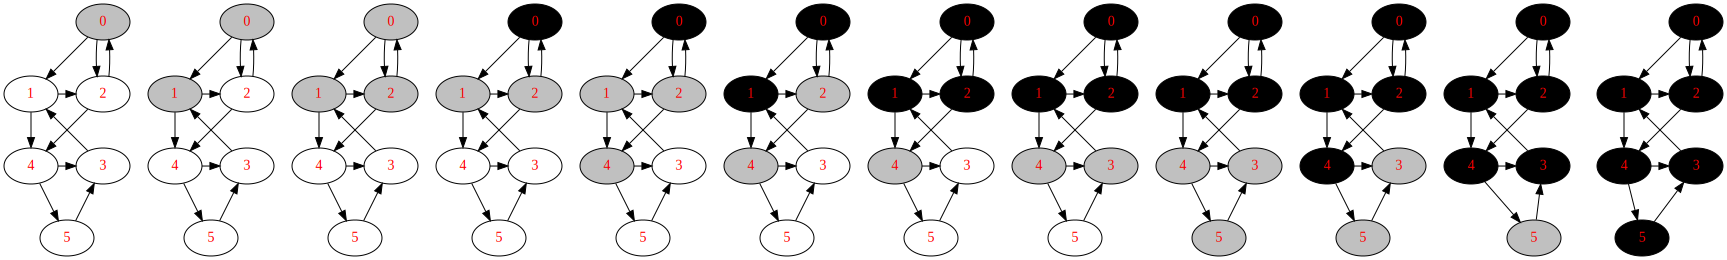

In [561]:
dot = bfgs_state_plot(dcg, 0)
dot

## Tree Search

The sample code is writen in [tree_datastructure_and_traversal](https://colab.research.google.com/drive/1pg49npUd4Rhbg5fggs8ZYakA563YATeA).